# Gender Recognition by Voice

---



# Loading Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Getting Started

### Loading data

In [28]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Checking for null values

In [29]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### Data Description 

In [30]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Dataframe shape

In [31]:
data.shape

(3168, 21)

In [32]:
print("Total number of labels: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


# Visualizations

### Correlation among features

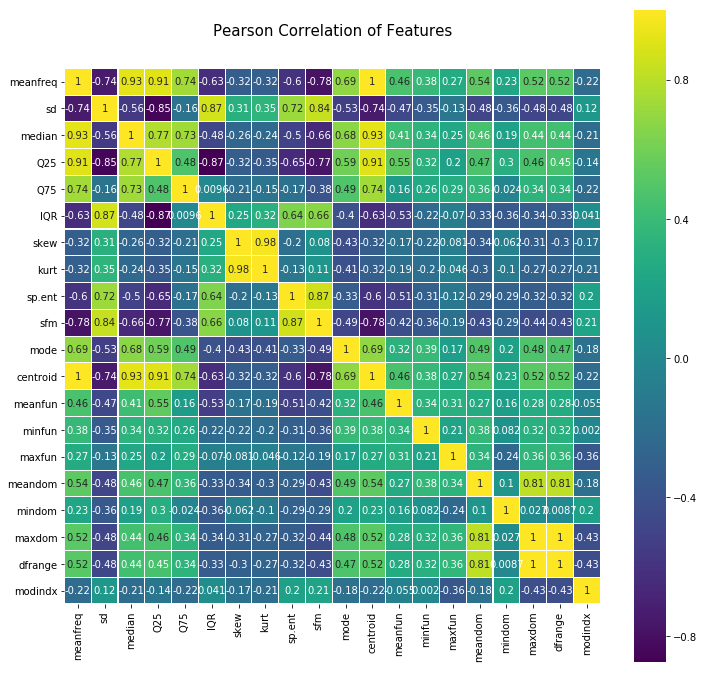

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### TNSE

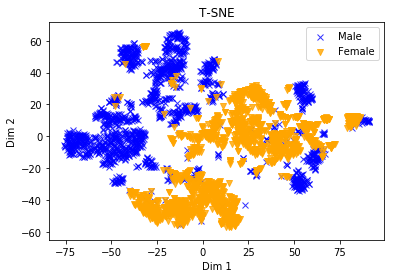

In [34]:
X = data.iloc[:, :-1]
y = data['label']
y = y.replace({'male':1,'female':0})

# Rescale data before TSNE
X_scale = StandardScaler().fit_transform(X)

# Sklearn TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_scale)

plt.figure()
plt.scatter(X_t[np.where(y == 0), 0],
                   X_t[np.where(y == 0), 1],
                   marker='x', color='blue',
                   linewidth='1', alpha=0.8, label='Male')
plt.scatter(X_t[np.where(y == 1), 0],
                   X_t[np.where(y == 1), 1],
                   marker='v', color='orange',
                   linewidth='1', alpha=0.8, label='Female')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.show()  

### Scatter plot of given features
You can compare other features by simply change "meanfun" and "meanfreq"

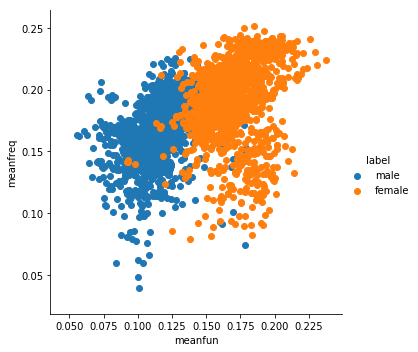

In [10]:
sns.FacetGrid(data, hue="label", height=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

### Boxplot
You can visualize other features by substituting "meanfun"

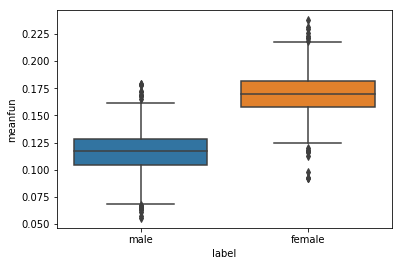

In [11]:
sns.boxplot(x="label",y="meanfun",data=data)
plt.show()

### Visualizing multiple feature relations

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


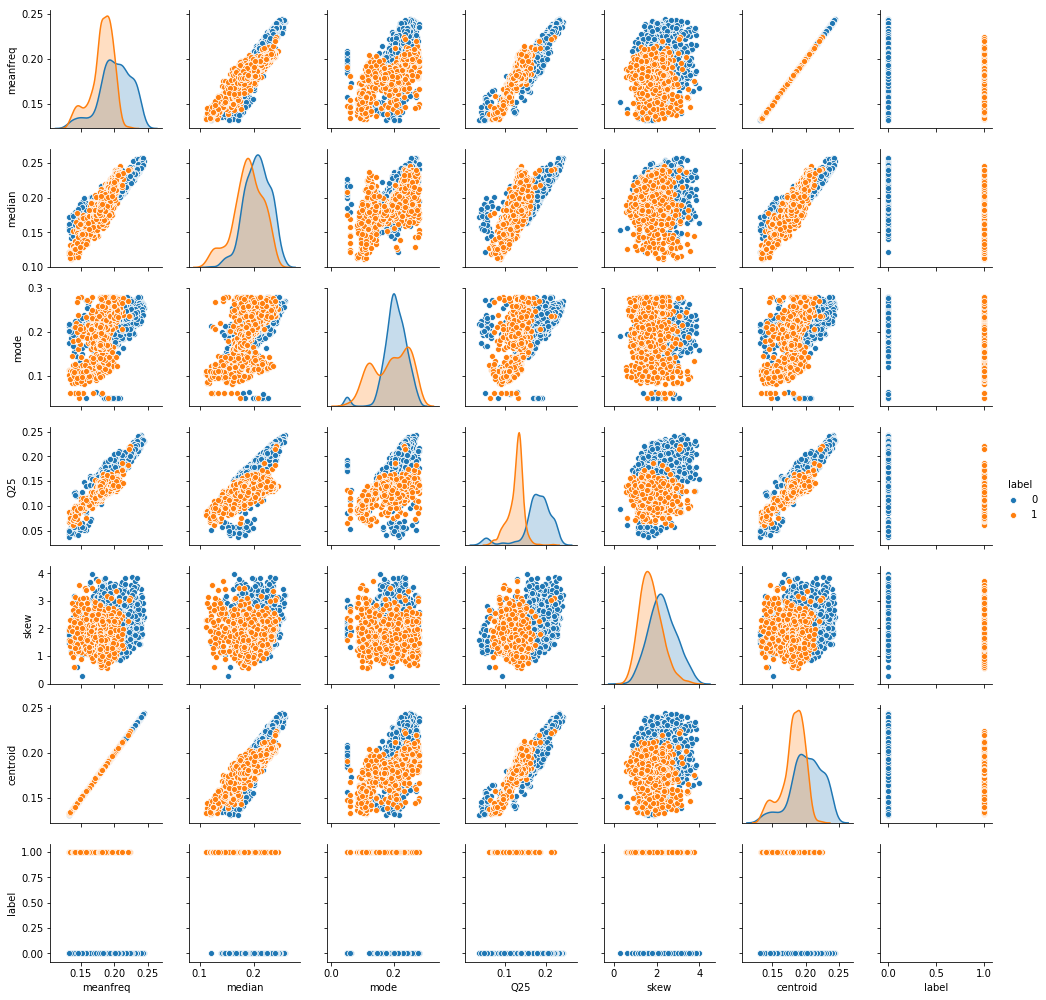

In [84]:
sns.pairplot(data[['meanfreq','median','mode', 'Q25', 'skew', 'centroid', 'label']],hue='label', height=2)
plt.show()

### Distribution of male and female(every feature)

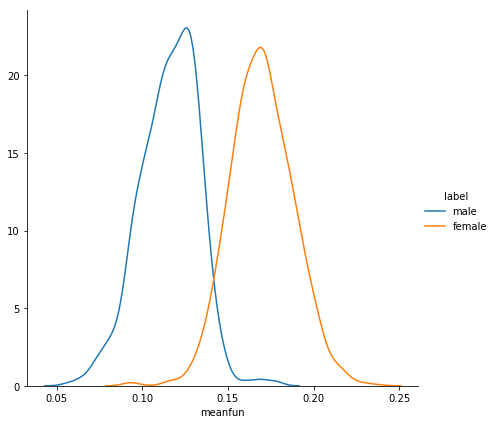

In [13]:
sns.FacetGrid(data, hue="label", height=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

# Changing the labels to binary

In [0]:
temp = []
for i in data.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
data['label'] = temp

# Removing Outliers

Remove data points which are outside the range

In [0]:
def calc_limits(feature):
    q1,q3=data[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [0]:
# removal of any data point which is an outlier for any fetaure.
for col in data.columns:
    lower,upper=calc_limits(col)
    data = data[(data[col] >lower) & (data[col]<upper)]

# Selecting Features 

Dropping few columns with high correlations

In [11]:
n_data=data.copy()

n_data.drop(['centroid','skew','kurt','mindom','maxdom'],axis=1,inplace=True) # only one of maxdom and dfrange.
n_data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


# Feature Extraction

Applying the Emprical formula using meanfreq, median and mode because of the assymetrical *distribution*

In [0]:
n_data['meanfreq']=n_data['meanfreq'].apply(lambda x:x*2)
n_data['median']=n_data['meanfreq']+n_data['mode']
n_data['median']=n_data['median'].apply(lambda x:x/3)

In [13]:
n_data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.381693,0.065790,0.143941,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.336692,0.074121,0.132242,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.362031,0.074369,0.140663,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.351319,0.071652,0.161910,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.349651,0.071533,0.156550,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


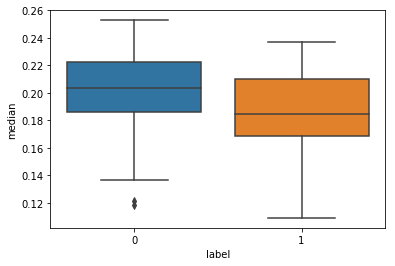

In [25]:
sns.boxplot(data=n_data,y='median',x='label')

# Creating new feature using Karl Pearson Coffecient

Coefficent = (Mean - Mode )/ Standard Deviation

In [15]:
# Extracting more features.
n_data['pear_skew']=n_data['meanfreq']-n_data['mode']
n_data['pear_skew']=n_data['pear_skew']/n_data['sd']
n_data[n_data['label']==0].head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label,pear_skew
1588,0.417009,0.057550,0.155725,0.190343,0.249759,0.059416,0.879674,0.343548,0.050165,0.162043,0.016807,0.262295,0.260789,0.757812,0.251546,0,6.374324
1591,0.409036,0.068569,0.153034,0.192230,0.255276,0.063046,0.896919,0.409583,0.050066,0.163077,0.016754,0.275862,0.205000,0.710938,0.235348,0,5.235150
1592,0.396584,0.062668,0.148882,0.183674,0.236498,0.052824,0.902083,0.449973,0.050062,0.162897,0.016684,0.271186,0.357244,0.875000,0.265306,0,5.529481
1593,0.368500,0.069538,0.139534,0.180113,0.227361,0.047248,0.909607,0.526946,0.050102,0.143819,0.015764,0.271186,0.222982,0.960938,0.206433,0,4.578736
1594,0.383589,0.038089,0.197409,0.169845,0.213974,0.044129,0.889682,0.260590,0.208638,0.170613,0.032854,0.275862,0.839015,6.984375,0.192857,0,4.593248
1595,0.386008,0.038431,0.198882,0.170734,0.213307,0.042572,0.873564,0.277530,0.210639,0.157393,0.015826,0.246154,0.647629,5.945312,0.102606,0,4.563213
1597,0.368969,0.045272,0.175246,0.155499,0.211270,0.055771,0.912666,0.337722,0.156770,0.156678,0.018913,0.258065,0.797917,5.945312,0.210145,0,4.687159
1603,0.293023,0.088300,0.153468,0.052952,0.222657,0.169705,0.964292,0.747201,0.167380,0.195872,0.055556,0.275862,0.411932,2.968750,0.109273,0,1.422902
1606,0.321490,0.090561,0.193897,0.061751,0.243232,0.181481,0.958113,0.724561,0.260202,0.193687,0.057348,0.258065,0.462358,0.718750,0.246739,0,0.676757
1611,0.298005,0.083574,0.170532,0.064760,0.215240,0.150479,0.956487,0.718422,0.213591,0.187319,0.050794,0.275862,0.608696,3.398438,0.204807,0,1.010050


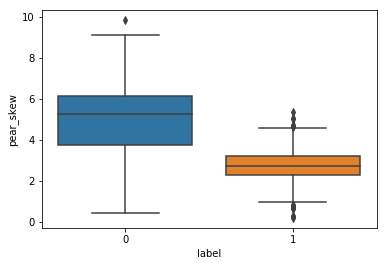

In [75]:
sns.boxplot(data=n_data,y='pear_skew',x='label')

# Modeling

Scaling the data

In [0]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(n_data.drop('label',axis=1))
X=scaled_df
Y=data['label'].values

Splitting the data in 80-20 ratio

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

Running all the classification algorithms with default values at once.

In [19]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        XGBClassifier()]
model_names=['Logistic Regression','Linear SVM','Kernal SVM','KNearest Neighbors','Random Forest Classifier','Decision Tree',
             'Gradient Boosting Classifier','Gaussian NB','XGBClassifier']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
acc_frame=pd.DataFrame(d)
model_acc = acc_frame.sort_values(by=['Accuracy'],ascending=False)
model_acc

,Modelling Algo,Accuracy
2,Kernal SVM,0.993789
0,Logistic Regression,0.990683
1,Linear SVM,0.987578
8,XGBClassifier,0.987578
4,Random Forest Classifier,0.984472
6,Gradient Boosting Classifier,0.981366
3,KNearest Neighbors,0.978261
5,Decision Tree,0.965839
7,Gaussian NB,0.953416


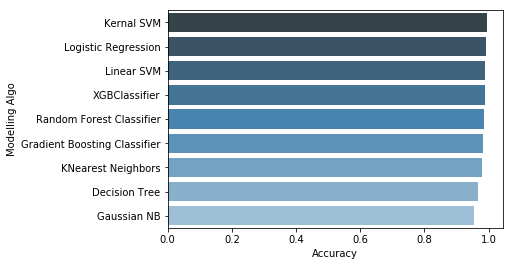

In [23]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=model_acc,palette="Blues_d")

# Parameter Tuning with Grid Search

Tuning SVC

In [81]:
param_grid = [
  {'C': [0.001,0.01,0.1,1,10,100,1000], 'kernel': ['linear']},
  {'C': [0.001,0.01,0.1,1,10,100,1000], 'gamma': [0.0001,0.001,0.01,0.1,1,10,100], 'kernel': ['rbf']},
 ]
clf=GridSearchCV(estimator=SVC(),param_grid=param_grid,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
print('Best Parameters for SVC: ',clf.best_params_)
print('Best Score for SVC: ',clf.best_score_)
print('Precision Score for SVC: ',precision_score(clf.predict(x_test),y_test))

Best Parameters for SVC:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score for SVC:  0.9813229571984435
Precision Score for SVC:  0.9891891891891892


Tuning XGB

In [83]:
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [1],
              'subsample': [i/10.0 for i in range(8,11)],
              'colsample_bytree': [i/10.0 for i in range(7,11)],
              'n_estimators': [1000],
              'gamma': [i/10.0 for i in range(3,6)]
             }
clf_xgb=GridSearchCV(estimator=XGBClassifier(),param_grid=parameters,scoring='accuracy',cv=10)
clf_xgb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'objective': ['binary:logistic'], 'learning_rate': [0.1], 'max_depth': [5], 'min_child_weight': [1], 'subsample': [0.8, 0.9, 1.0], 'colsample_bytree': [0.7, 0.8, 0.9, 1.0], 'n_estimators': [1000], 'gamma': [0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
print('Best Parameters for XGB: ',clf_xgb.best_params_)
print('Best Score for XGB: ',clf_xgb.best_score_)
print('Precision Score for XGB: ',precision_score(clf_xgb.predict(x_test),y_test))

Best Parameters for XGB:  {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000, 'objective': 'binary:logistic', 'subsample': 0.9}
Best Score for XGB:  0.980544747081712
Precision Score for XGB:  0.9783783783783784


## The Precision Score of approx 99% by SVM, which is really great.
## I think better tuning of XGB might also give higher score.